In [1]:
import matplotlib.pyplot as plt
import numpy as np
from data_generator import DataGenerator

from config import symbols_dict

In [2]:
DG = DataGenerator(
    symbols_dict=symbols_dict, n_trials=10, n_letters=10, n_ch=8
)

In [3]:
data, target = DG.generate()

In [4]:
data

array([[[-0.06703559,  0.27088187,  0.33457027, ..., -0.14757169,
         -0.02583843, -0.11360774],
        [-0.33474834,  0.35484862,  0.02568402, ..., -0.02650215,
          0.08027751, -0.3165162 ],
        [-0.20570087, -0.50086079, -0.1515343 , ...,  0.10103137,
         -0.5244269 ,  0.33659499],
        ...,
        [ 0.09483397,  0.44087945,  0.02940206, ...,  0.7522824 ,
          0.01859825, -0.01931033],
        [ 0.31164959,  0.16115363,  0.02719155, ...,  0.39931352,
         -0.12791097, -0.21510883],
        [-0.47983613, -0.04327993, -0.2175786 , ...,  0.36236719,
         -0.3826509 ,  0.0653315 ]],

       [[ 0.26595502,  0.38406662, -0.05107714, ...,  0.11280092,
          0.35737908, -0.15280501],
        [ 0.29750226, -0.36282142,  0.01855515, ...,  0.56996551,
          0.16045786,  0.21009557],
        [ 0.02788273, -0.46168025,  0.44163405, ..., -0.06036391,
          0.04938305, -0.5298906 ],
        ...,
        [ 0.28539717,  0.19323827,  0.01990554, ..., -

In [5]:
target

[['a', 0],
 ['a', 1],
 ['a', 2],
 ['a', 3],
 ['a', 4],
 ['a', 5],
 ['a', 6],
 ['a', 7],
 ['a', 8],
 ['a', 9],
 ['b', 0],
 ['b', 1],
 ['b', 2],
 ['b', 3],
 ['b', 4],
 ['b', 5],
 ['b', 6],
 ['b', 7],
 ['b', 8],
 ['b', 9],
 ['c', 0],
 ['c', 1],
 ['c', 2],
 ['c', 3],
 ['c', 4],
 ['c', 5],
 ['c', 6],
 ['c', 7],
 ['c', 8],
 ['c', 9],
 ['d', 0],
 ['d', 1],
 ['d', 2],
 ['d', 3],
 ['d', 4],
 ['d', 5],
 ['d', 6],
 ['d', 7],
 ['d', 8],
 ['d', 9],
 ['e', 0],
 ['e', 1],
 ['e', 2],
 ['e', 3],
 ['e', 4],
 ['e', 5],
 ['e', 6],
 ['e', 7],
 ['e', 8],
 ['e', 9],
 ['f', 0],
 ['f', 1],
 ['f', 2],
 ['f', 3],
 ['f', 4],
 ['f', 5],
 ['f', 6],
 ['f', 7],
 ['f', 8],
 ['f', 9],
 ['g', 0],
 ['g', 1],
 ['g', 2],
 ['g', 3],
 ['g', 4],
 ['g', 5],
 ['g', 6],
 ['g', 7],
 ['g', 8],
 ['g', 9],
 ['i', 0],
 ['i', 1],
 ['i', 2],
 ['i', 3],
 ['i', 4],
 ['i', 5],
 ['i', 6],
 ['i', 7],
 ['i', 8],
 ['i', 9],
 ['j', 0],
 ['j', 1],
 ['j', 2],
 ['j', 3],
 ['j', 4],
 ['j', 5],
 ['j', 6],
 ['j', 7],
 ['j', 8],
 ['j', 9],
 ['k', 0],

In [6]:
data[99, :, :]

array([[-0.49544663,  0.6438225 ,  0.30606964, ..., -0.0429881 ,
        -0.52599038,  0.05184817],
       [ 0.13956636,  0.33642636,  0.17906298, ..., -0.20789754,
         0.04418068,  0.21192691],
       [-0.20622174,  0.48968026, -0.28673094, ...,  0.49008448,
         0.25217344,  0.51693855],
       ...,
       [ 0.69439513, -0.37723701, -0.14941747, ..., -0.16790541,
        -0.64823982, -0.15003265],
       [-0.31081915,  0.4894728 , -0.44971088, ..., -0.21952475,
        -0.11049338,  0.25294425],
       [ 0.10211971, -0.16597793,  0.01186048, ..., -0.0705284 ,
         0.13543748,  0.46389221]], shape=(8, 400))

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()
lg = LogisticRegression()

In [9]:
target_label = le.fit_transform(np.array(target)[:, 0])
data_reshaped = data.reshape(100, -1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    data_reshaped,
    target_label,
    shuffle=True,
    test_size=0.2,
    stratify=target_label,
)

In [11]:
lg.fit(X=X_train, y=y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [12]:
y_pred = lg.predict(X_test)

In [13]:
y_pred

array([0, 3, 0, 0, 0, 2, 4, 0, 2, 4, 8, 2, 6, 1, 3, 3, 5, 2, 3, 5])

In [14]:
y_test

array([7, 8, 5, 3, 1, 7, 9, 8, 2, 2, 9, 6, 6, 4, 0, 3, 0, 5, 1, 4])

In [15]:
lg.score(X_test, y_test)

0.15

In [17]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         1
           2       0.50      0.25      0.33         4
           3       0.50      0.25      0.33         4
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.50      1.00      0.67         1
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0

    accuracy                           0.15        20
   macro avg       0.15      0.15      0.13        20
weighted avg       0.23      0.15      0.17        20



C:\Users\sidikov\micromamba\envs\Neuro\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\sidikov\micromamba\envs\Neuro\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\sidikov\micromamba\envs\Neuro\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


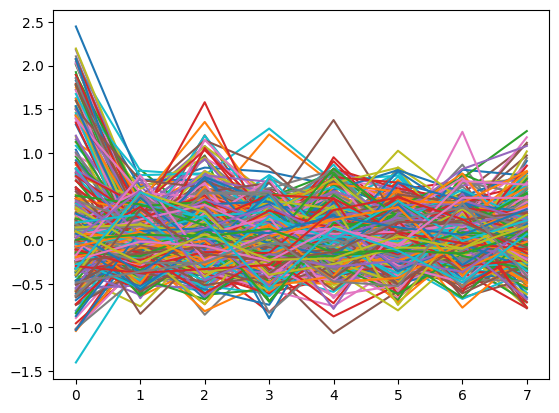

In [17]:
plt.plot(data[11, :, :])
plt.show()